# Q5 - Answers

### Attention!

The template for this notebook has been acquired from https://github.com/ShahabAsoodeh/4ML3. I've implemented my solutions in the space provided for each algorithm, and wrote the scripts for tasks (1) (2) and (3) at the end of the noteboook myself. Make sure to notice the modified code, as my answers for question 5 are within this notebook template provided by Dr. Asoodeh.

# Linear & Polynomial Regression (Analytic)

We will explore **linear regression** and **polynomial regression** using a synthetic dataset (`synthetic_regression.csv` with columns `x, y`). All solutions must use **analytic (closed-form)** formulas — **no gradient descent, no library `.fit()`** methods. Implement everything directly in **NumPy**.

## Tasks
1. **70/30 Train–Test Split (Unregularized)**
   - Split the data into 70% train / 30% test (random, reproducible).

   - Fit the following models:
     - Linear regression (polynomial degree 1),
     - Polynomial regression with degrees $k\in \{2, 5, 10, 15\}$.

   - For each model, build the design matrix explicitly:  For each datapoint, the row is given by

     $$\Phi(x) = [1, x, x^2, \dots, x^k].$$

     (let's call the design matrix $\Phi$ instead of $X$.)

   - Solve using the equations we derived in class:

     $$\mathbf{\theta}^* = (\Phi^\top\Phi)^{-1}\Phi^\top \mathbf{y}.$$

   - Compute **training error** and **test error**.

   - Plot (a) the dataset points with all model fits on one figure, and (b) a **bar chart** of training vs test errors.

2. **10-Fold Cross-Validation (Unregularized)**
   - Implement 10-fold CV yourself (shuffle indices once, split into folds).

   - For each degree {1, 2, 5, 10, 15}, compute the **average test error** across folds.

   - Plot a **bar chart** comparing the average test error across all models. Conclude the best hypothesis class.

3. **Repeat (1) and (2) with Ridge Regularization**.
   - Use ridge regression with: $$\mathbf{\theta}^*_\lambda = (\Phi^\top\Phi + \lambda I)^{-1}\Phi^\top \mathbf{y}.$$

   - **Take $\lambda = 1$** (fixed).

   - Show the same plots: fitted curves, bar chart of train/test errors, and bar chart of 10-fold average test errors.

### Notes
- If any bar chart scale makes some bars invisible, **use a logarithmic y-axis**: `plt.yscale("log")`.
- Keep your code structured and use the provided skeleton below.



## Functions to Implement

For this assignment, you will write the following functions yourself.  
Each function connects the mathematical definition we studied in class to working NumPy code. 

---

## 1. `design_matrix_poly_1d(x_column, degree, include_bias=True)`
- Build the design matrix **Φ** for **polynomial regression**:  
  \[
  $\Phi(x) = [1, x, x^2, \dots, x^k]$
  \]
- **Input:** vector of $x$-values, degree \(k\).  
- **Output:** design matrix of shape $(n \times (k+1)$.  

---

## 2. `normal_equation(Phi, y)`
- Compute the **closed-form OLS solution**:  
  \[
  $\theta^* = (\Phi^\top \Phi)^{-1} \Phi^\top \mathbf{y}$
  \]
  (or use the pseudoinverse if singular).  
- **Input:** design matrix $\Phi$, targets $\mathbf{y}$.  
- **Output:** regression coefficient vector $\mathbf{\theta}$.  

---

### 3. `ridge_closed_form(Phi, y, lam)`
- Compute the **ridge regression** solution:  
  \[
  $\theta^*_\lambda = (\Phi^\top \Phi + \lambda I)^{-1} \Phi^\top \mathbf{y}$
  \]
- **Input:** design matrix $\Phi$, targets $\mathbf{y}$, regularization parameter $\lambda$.  
- **Output:** coefficient vector $\mathbf{\theta}$.  

---

### 4. `predict(Phi, theta)`
- Generate predictions:  
  \[
  $\hat{\mathbf{y}} = \Phi \mathbf{\theta}$
  \]
- **Input:** design matrix $\Phi$, coefficients $\mathbf{\theta}$.  
- **Output:** predicted values.  

---

### 5. `err(y_true, y_pred)`
- Compute the **average squared error**:  
  \[
  $\text{Error} = \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2$ 
  \]
- **Input:** true values $\mathbf{y}$, predicted values $\mathbf{\hat{y}}$.  
- **Output:** scalar error.  

---


## Functions to use:

You can use the following functions for reading the data, doing the test-train split and also for the k-fold CV.
### 6. `kfold_indices(n, K, seed=0)`
- Generate index splits for **K-fold cross-validation**.  
- **Input:** dataset size \(n\), number of folds \(K\), optional random seed.  
- **Output:** list of `train_idx` and `val_idx` pairs.  

---

### 7. `train_test_split_indices(n, test_ratio=0.3, seed=42)`
- Randomly split dataset into **training** and **test** sets.  
- **Input:** dataset size \(n\), test ratio, optional random seed.  
- **Output:** two arrays: `train_idx`, `test_idx`.  

---

### 8. `load_csv_xy(path)`
- Load a CSV file with columns **`x`** and **`y`**.  
- **Output:**  
  - \(X\): array of shape \(n \times 1\),  
  - \(y\): vector of shape \(n\).  

---
  




  


## Starter Skeleton (fill the TODOs)
Update the CSV path to where you saved `synthetic_regression.csv`.


In [13]:
import numpy as np
import csv
import matplotlib.pyplot as plt


def design_matrix_poly_1d(x_column: np.ndarray, degree: int, include_bias: bool=True) -> np.ndarray:
    """Return Vandermonde-style design matrix [1, x, x^2, ..., x^degree]."""
    return x_column ** np.arange(degree + 1)[np.newaxis, :]


def normal_equation(Phi: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Closed-form least squares: theta = (Phi^T Phi)^{-1} Phi^T y."""
    # Note: np.linalg.pinv is used to compute Moore-Penrose pseudoinverse. If Phi^T Phi is invertible, this is equivalent to using np.linalg.inv.
    return np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ y

def ridge_closed_form(Phi: np.ndarray, y: np.ndarray, lam: float) -> np.ndarray:
    """Closed-form ridge: theta = (Phi^T Phi + λI)^{-1} Phi^T y."""
    I_d = np.eye(Phi.shape[1]) # Identity matrix of features
    return np.linalg.pinv(Phi.T @ Phi + lam * I_d) @ Phi.T @ y

def predict(Phi: np.ndarray, theta: np.ndarray) -> np.ndarray:
    return Phi @ theta


def err(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean(np.sum((y_pred - y_true)**2))

def kfold_indices(n: int, K: int, seed: int = 0):
    rng = np.random.default_rng(seed)
    idx = np.arange(n)
    rng.shuffle(idx)
    folds = np.array_split(idx, K)
    splits = []
    for k in range(K):
        val_idx = folds[k]
        train_idx = np.concatenate([folds[i] for i in range(K) if i != k])
        splits.append((train_idx, val_idx))
    return splits

def train_test_split_indices(n: int, test_ratio: float = 0.3, seed: int = 42):
    rng = np.random.default_rng(seed)
    idx = np.arange(n)
    rng.shuffle(idx)
    n_test = int(round(test_ratio * n))
    test_idx = idx[:n_test]
    train_idx = idx[n_test:]
    return train_idx, test_idx

def load_csv_xy(path: str):
    xs, ys = [], []
    with open(path, "r") as f:
        rd = csv.DictReader(f)
        for row in rd:
            xs.append(float(row["x"]))
            ys.append(float(row["y"]))
    X = np.array(xs).reshape(-1, 1)
    y = np.array(ys)
    return X, y


### Load Dataset

In [14]:
X, y = load_csv_xy("synthetic_regression.csv")

train_idx, test_idx = train_test_split_indices(X.shape[0])
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

### Bar Plot Script

In [15]:
"""
Plot for making a bar chart of the mse_train and mse_test put against k degrees
"""
def bar_plot_mse(mse_train, mse_test, degrees):
    x = np.arange(len(degrees))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, mse_train, width, label='Train MSE', alpha=0.8)
    plt.bar(x + width/2, mse_test, width, label='Test MSE', alpha=0.8)

    plt.yscale('log')
    plt.xlabel('k (polynomial degree)')
    plt.ylabel('MSE (log scale)')
    plt.title('Training vs Test MSE for Different Polynomial Degrees')
    plt.xticks(x, degrees)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

### Model Plot Script

In [16]:
"""
Plot multiple polynomial fits on the same graph using pre-computed theta parameters
"""
def plot_multiple_fits(X, y, X_train, y_train, X_test, y_test, degrees, thetas, title="Polynomial Fits"):
    """
    Plot data points and polynomial curves using pre-computed parameters.
    
    Parameters:
    - X, y: Full dataset
    - X_train, y_train: Training data points
    - X_test, y_test: Test data points  
    - degrees: List of polynomial degrees [k1, k2, k3, ...]
    - thetas: List of pre-computed parameter vectors [theta1, theta2, theta3, ...]
    - title: Plot title
    """
    
    # Create a range of x values for smooth curve plotting
    x_min, x_max = X.min(), X.max()
    x_range = np.linspace(x_min, x_max, 300).reshape(-1, 1)
    
    # Create plot
    plt.figure(figsize=(12, 8))
    
    # Plot fitted curves for each degree FIRST (so they appear behind the points)
    colors = ['red', 'green', 'darkviolet', 'brown', 'pink']  # Avoided orange to prevent conflict
    for i, (k, theta) in enumerate(zip(degrees, thetas)):
        # Generate predictions for smooth curve using pre-computed theta
        Phi_range = design_matrix_poly_1d(x_range, k)
        y_fit = predict(Phi_range, theta)
        
        # Plot the curve
        plt.plot(x_range, y_fit, color=colors[i % len(colors)], 
                linewidth=2, label=f'k={k}')
    
    # Scatter plot of data points AFTER curves (so they appear on top)
    plt.scatter(X_train, y_train, alpha=0.8, color='blue', label='Training data', s=30, edgecolors='black', linewidth=0.5)
    plt.scatter(X_test, y_test, alpha=0.8, color='orange', label='Test data', s=40, edgecolors='black', linewidth=0.5)
    
    plt.xlabel('x')
    plt.yscale('log')
    plt.ylabel('y (log scale)')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

### (Task 1) 70/30 Train-Test Split

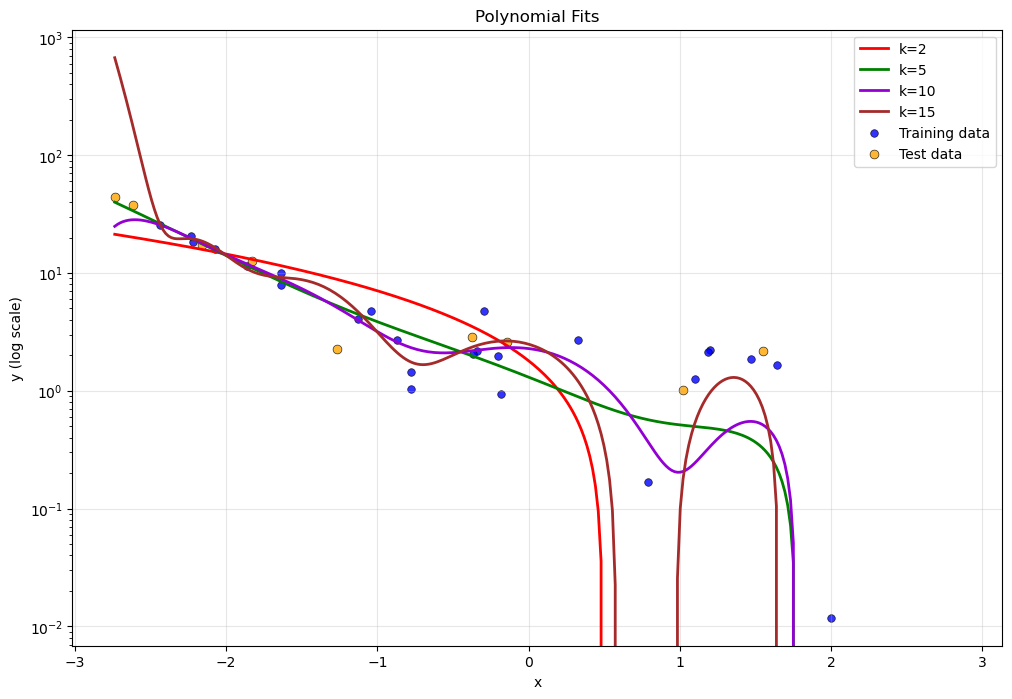

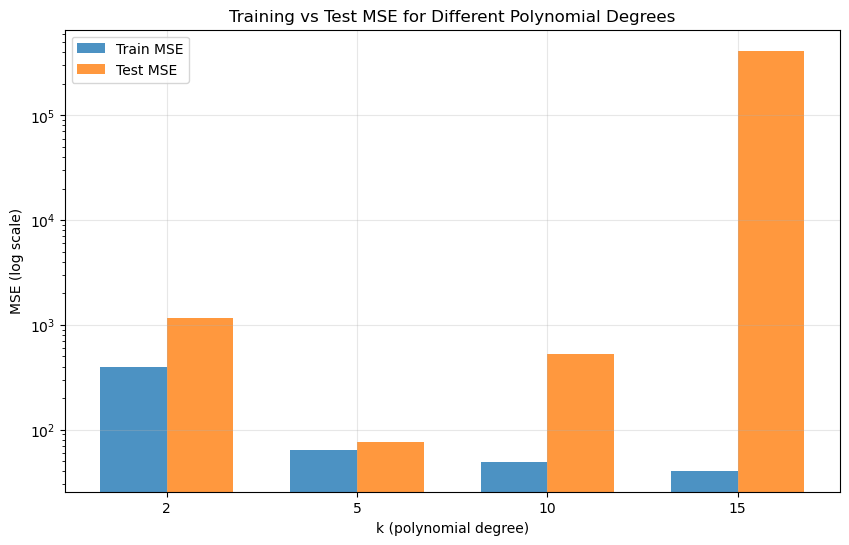

In [17]:
degrees = [2, 5, 10, 15]

mse_test = []
mse_train = []
thetas = []
for k in degrees:

    # Preprocessing
    Phi_train = design_matrix_poly_1d(X_train, k)
    Phi_test = design_matrix_poly_1d(X_test, k)

    # Best hypothesis
    theta = normal_equation(Phi_train, y_train)
    thetas.append(theta)
    # MSE
    y_pred = predict(Phi_test, theta)
    mse_test.append(err(y_test, y_pred))
    y_pred = predict(Phi_train, theta)
    mse_train.append(err(y_train, y_pred))

plot_multiple_fits(
    X, y, 
    X_train, y_train, 
    X_test, y_test, 
    degrees, thetas
)
bar_plot_mse(mse_train, mse_test, degrees)    

Interpretation: the 70/30 train-test split suggests that k=5 polynomial degree is the best-fitting hypothesis.

### (Task 2) 10-Fold Cross-Validation

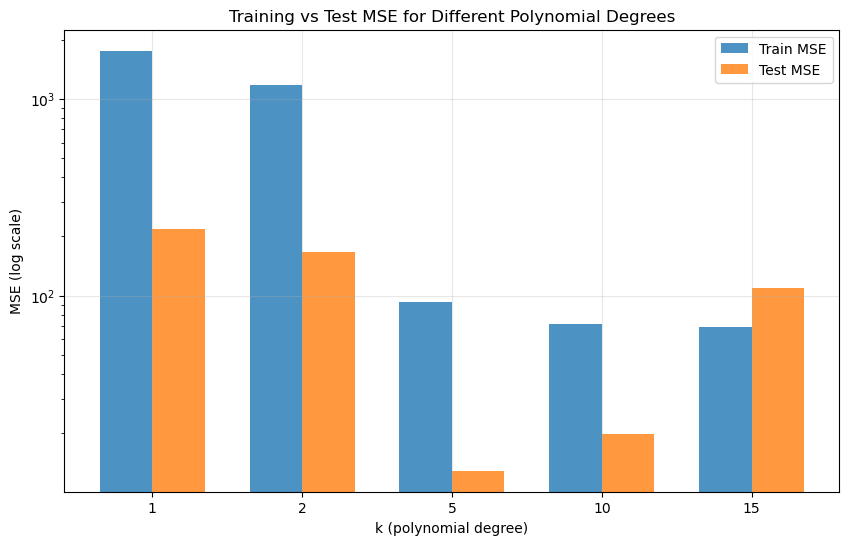

In [18]:
idxs = kfold_indices(X.shape[0], K=10)

degrees = [1,2,5,10,15]

mse_cv_test = []
mse_cv_train = []
for k in degrees:
    fold_mse_test = []
    fold_mse_train = []
    # Cross-validation for kth degree polynomial
    for tidx, vidx in idxs:
        X_train, y_train = X[tidx], y[tidx]
        X_val, y_val = X[vidx], y[vidx]
        # Preprocessing
        Phi_train = design_matrix_poly_1d(X_train, k)
        Phi_val = design_matrix_poly_1d(X_val, k)
        # Hypothesis
        theta = normal_equation(Phi_train, y_train)
        # MSE
        y_pred = predict(Phi_val, theta)
        fold_mse_test.append(err(y_val, y_pred))
        y_pred = predict(Phi_train, theta)
        fold_mse_train.append(err(y_train, y_pred))
    # Store mean (average) of cv results
    mse_cv_test.append(np.mean(fold_mse_test))
    mse_cv_train.append(np.mean(fold_mse_train))

bar_plot_mse(mse_cv_train, mse_cv_test, degrees)

Interpretation: The 10-fold cross-validation experiment suggests that k=5 polynomial degree gives the best hypothesis.

### (Task 3) 70/30 Train-Test Split w/ Ridge

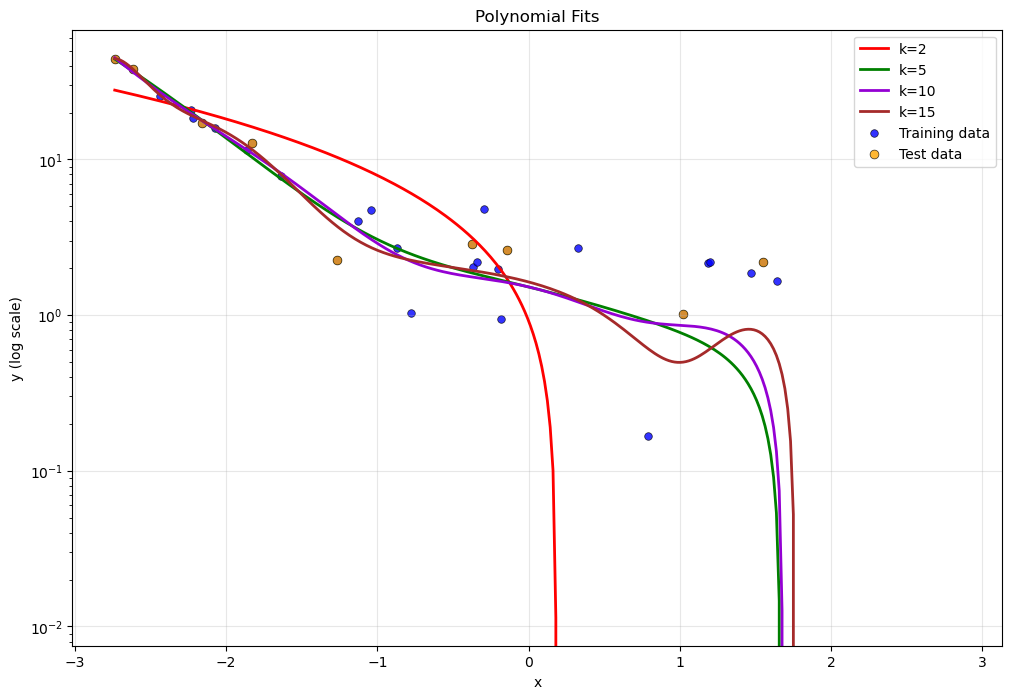

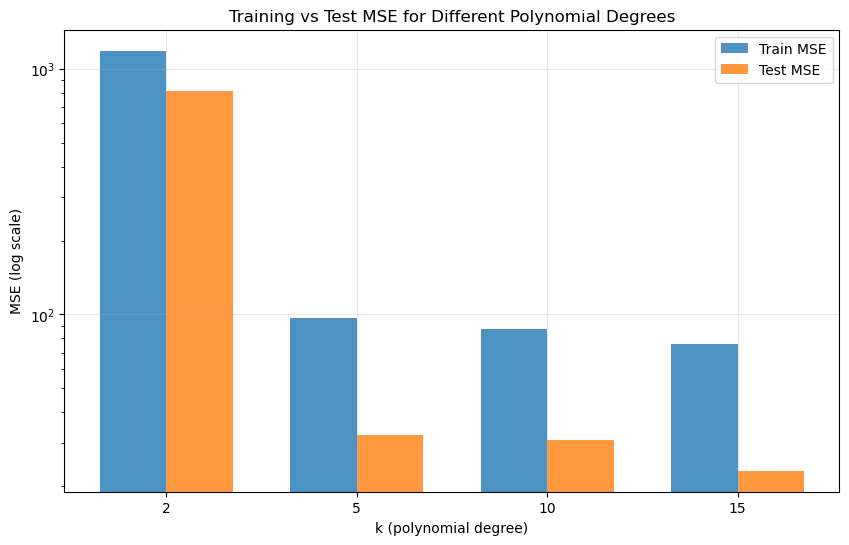

In [19]:
degrees = [2, 5, 10, 15]

mse_test = []
mse_train = []
thetas = []
for k in degrees:

    # Preprocessing
    Phi_train = design_matrix_poly_1d(X_train, k)
    Phi_test = design_matrix_poly_1d(X_test, k)

    # Hypothesis (ridge)
    theta = ridge_closed_form(Phi_train, y_train, lam=1.0)
    thetas.append(theta)
    # MSE (ridge)
    y_pred = predict(Phi_test, theta)
    mse_test.append(err(y_test, y_pred))
    y_pred = predict(Phi_train, theta)
    mse_train.append(err(y_pred, y_train))

plot_multiple_fits(
    X, y, 
    X_train, y_train, 
    X_test, y_test, 
    degrees, thetas
)
bar_plot_mse(mse_train, mse_test, degrees)

Interpretation: the 70/30 train-test split with ridge optimization suggests that k=15 is the best hypothesis. However, the testing happened on a single training set and the results are not as reliable as a cross-validation experiment.

### (Task 3) 10-Fold Cross-Validation w/ Ridge

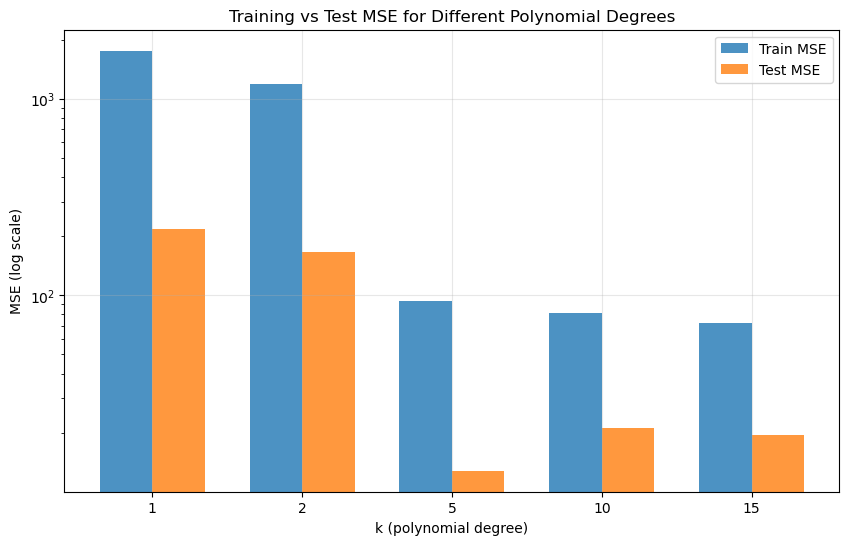

In [20]:
idxs = kfold_indices(X.shape[0], K=10)

degrees = [1,2,5,10,15]

mse_cv_test = []
mse_cv_train = []
for k in degrees:
    fold_mse_test = []
    fold_mse_train = []
    # Cross-validation for kth degree polynomial
    for tidx, vidx in idxs:
        X_train, y_train = X[tidx], y[tidx]
        X_val, y_val = X[vidx], y[vidx]
        # Preprocessing
        Phi_train = design_matrix_poly_1d(X_train, k)
        Phi_val = design_matrix_poly_1d(X_val, k)
        # Hypothesis
        theta = ridge_closed_form(Phi_train, y_train, lam=1.0)
        # MSE
        y_pred = predict(Phi_val, theta)
        fold_mse_test.append(err(y_val, y_pred))
        y_pred = predict(Phi_train, theta)
        fold_mse_train.append(err(y_train, y_pred))
    # Store mean (average) of cv results
    mse_cv_test.append(np.mean(fold_mse_test))
    mse_cv_train.append(np.mean(fold_mse_train))

bar_plot_mse(mse_cv_train, mse_cv_test, degrees)

Interpretation: The 10-fold cross-validation experiment with ridge optimization suggests that k=5 is the best hypothesis complexity.

**In conclusion, it can be determined that k=5 polynomial complexity provides the best hypothesis, both for OLS and ridge optimization.**